<a href="https://colab.research.google.com/github/joyeee2/py-05/blob/master/wk10_py_data_science_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Python data science: pandas & graphics wokout

## Using pandas

* [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/10min.html)
* [Pandas tutorial with interactive exercises](https://www.kaggle.com/pistak/pandas-tutorial-with-interactive-exercises)

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### [1] Make data, Series, and DataFrame

### Series

In [3]:
# Creating a Series by passing a list of values
s = pd.Series([1,3,5,np.nan,6,8])  # Series는 벡터
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [4]:
# Creating a DataFrame by passing a NumPy array, with a datetime index and labeled columns:
dates = pd.date_range('20130101', periods=6)  # data = 인덱스 역할
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# Make dataframe using an array with random numbers
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list('ABCD'))  
df

# np.random.randn(6,4) = 6*4의 random 숫자를 만듬

,A,B,C,D
2013-01-01,1.638734,0.404539,-0.083975,-1.133042
2013-01-02,1.678163,-0.107702,0.932354,0.774285
2013-01-03,1.761447,-0.496669,0.341071,1.761759
2013-01-04,-0.120899,1.132350,-0.477775,-0.926147
2013-01-05,0.349312,1.236795,0.748792,-0.274232
2013-01-06,0.680625,-0.176243,-2.137644,-1.047409


In [6]:
# check types of df  --> same type
df.dtypes # 데이터 프레임 구조로 바꿔서 처리

A    float64
B    float64
C    float64
D    float64
dtype: object

In [0]:
# Creating a DataFrame by passing a dict of objects that can be converted to series-like.
df2 = pd.DataFrame({ 'A' : 1., # 데이터 값 하나만 지정 -> 다른 항목들도 같은것으로 채움
                    'B' : pd.Timestamp('20130102'),
                    'C' : pd.Series(1,index=list(range(4)),dtype='float32'),
                    'D' : np.array([3] * 4,dtype='int32'),
                    'E' : pd.Categorical(["test","train","test","train"]),
                    'F' : 'foo' })

In [8]:
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


In [9]:
# check types of df2 --> different types
df2.dtypes 

# pandas = 서로 다른 데이터타입을 다 담을 수 있느 효율적인 구조

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

### [2] Handling data

In [10]:
# head()
df.head()  # 상위 5개의 데이터 보여줌

,A,B,C,D
2013-01-01,1.638734,0.404539,-0.083975,-1.133042
2013-01-02,1.678163,-0.107702,0.932354,0.774285
2013-01-03,1.761447,-0.496669,0.341071,1.761759
2013-01-04,-0.120899,1.132350,-0.477775,-0.926147
2013-01-05,0.349312,1.236795,0.748792,-0.274232


In [11]:
df.tail(3)  # 하위 3개 데이터 보여줌

,A,B,C,D
2013-01-04,-0.120899,1.132350,-0.477775,-0.926147
2013-01-05,0.349312,1.236795,0.748792,-0.274232
2013-01-06,0.680625,-0.176243,-2.137644,-1.047409


In [12]:
# Display the index, columns, and the underlying NumPy data:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [13]:
df.columns  # 제목 보여줌, 데이터타입 문자객체

Index(['A', 'B', 'C', 'D'], dtype='object')

In [14]:
# describe() shows a quick statistic summary of your data:
df.describe()

# df.describe()-> 데이터의 각열의 통계적인(평균, 표준편차등의) 분포를 보여줌
# describe는 숫자형 항목만 처리한다

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,0.997897,0.332178,-0.112863,-0.140798
std,0.803675,0.721501,1.120242,1.174578
min,-0.120899,-0.496669,-2.137644,-1.133042
25%,0.432140,-0.159108,-0.379325,-1.017094
50%,1.159680,0.148419,0.128548,-0.600189
75%,1.668306,0.950398,0.646862,0.512156
max,1.761447,1.236795,0.932354,1.761759


In [15]:
df2.describe()

,A,C,D
count,4.0,4.0,4.0
mean,1.0,1.0,3.0
std,0.0,0.0,0.0
min,1.0,1.0,3.0
25%,1.0,1.0,3.0
50%,1.0,1.0,3.0
75%,1.0,1.0,3.0
max,1.0,1.0,3.0


In [16]:
# Transposing your dataframe:
df.T  # 전치

,2013-01-01 00:00:00,2013-01-02 00:00:00,2013-01-03 00:00:00,2013-01-04 00:00:00,2013-01-05 00:00:00,2013-01-06 00:00:00
A,1.638734,1.678163,1.761447,-0.120899,0.349312,0.680625
B,0.404539,-0.107702,-0.496669,1.132350,1.236795,-0.176243
C,-0.083975,0.932354,0.341071,-0.477775,0.748792,-2.137644
D,-1.133042,0.774285,1.761759,-0.926147,-0.274232,-1.047409


#### Sorting

In [17]:
# Sorting by an axis:
df.sort_index(axis=0, ascending=False) # axis = 0  ==> 행 기준, ascending=False ==> 최근날짜가 맨 위

,A,B,C,D
2013-01-06,0.680625,-0.176243,-2.137644,-1.047409
2013-01-05,0.349312,1.236795,0.748792,-0.274232
2013-01-04,-0.120899,1.132350,-0.477775,-0.926147
2013-01-03,1.761447,-0.496669,0.341071,1.761759
2013-01-02,1.678163,-0.107702,0.932354,0.774285
2013-01-01,1.638734,0.404539,-0.083975,-1.133042


In [18]:
# Sorting by an axis:
df.sort_index(axis=0, ascending=True) # ascending=True ==> 옛날 날짜부터 출력

,A,B,C,D
2013-01-01,1.638734,0.404539,-0.083975,-1.133042
2013-01-02,1.678163,-0.107702,0.932354,0.774285
2013-01-03,1.761447,-0.496669,0.341071,1.761759
2013-01-04,-0.120899,1.132350,-0.477775,-0.926147
2013-01-05,0.349312,1.236795,0.748792,-0.274232
2013-01-06,0.680625,-0.176243,-2.137644,-1.047409


In [19]:
df.sort_index(axis=1, ascending=False)  # axis = 1 ==> 열 기준

,D,C,B,A
2013-01-01,-1.133042,-0.083975,0.404539,1.638734
2013-01-02,0.774285,0.932354,-0.107702,1.678163
2013-01-03,1.761759,0.341071,-0.496669,1.761447
2013-01-04,-0.926147,-0.477775,1.132350,-0.120899
2013-01-05,-0.274232,0.748792,1.236795,0.349312
2013-01-06,-1.047409,-2.137644,-0.176243,0.680625


In [20]:
# Sorting by values:
df.sort_values(by='B') #, ascending=False)

# df.sort_values(by='B') ==> B열을 기준으로 정렬

,A,B,C,D
2013-01-03,1.761447,-0.496669,0.341071,1.761759
2013-01-06,0.680625,-0.176243,-2.137644,-1.047409
2013-01-02,1.678163,-0.107702,0.932354,0.774285
2013-01-01,1.638734,0.404539,-0.083975,-1.133042
2013-01-04,-0.120899,1.132350,-0.477775,-0.926147
2013-01-05,0.349312,1.236795,0.748792,-0.274232


#### Selecting data by indexing and slicing

> **at, iat, loc, iloc**
- loc : 로케이션
- iloc : 로케이션의 인덱스(i = 인덱스 의미)

In [21]:
# Selecting a single column, which yields a Series
df['A']

2013-01-01    1.638734
2013-01-02    1.678163
2013-01-03    1.761447
2013-01-04   -0.120899
2013-01-05    0.349312
2013-01-06    0.680625
Freq: D, Name: A, dtype: float64

In [22]:
# Selecting via [], which slices the rows.
df[0:3]  # 행

,A,B,C,D
2013-01-01,1.638734,0.404539,-0.083975,-1.133042
2013-01-02,1.678163,-0.107702,0.932354,0.774285
2013-01-03,1.761447,-0.496669,0.341071,1.761759


In [23]:
df['20130102':'20130104'] # 인덱스가 아닌 값인 경우는 지정된 범위가 다 선택된다.
# 제목으로 접근하면 범위 다 포함

,A,B,C,D
2013-01-02,1.678163,-0.107702,0.932354,0.774285
2013-01-03,1.761447,-0.496669,0.341071,1.761759
2013-01-04,-0.120899,1.132350,-0.477775,-0.926147


#### Selecting data by label

In [24]:
df

,A,B,C,D
2013-01-01,1.638734,0.404539,-0.083975,-1.133042
2013-01-02,1.678163,-0.107702,0.932354,0.774285
2013-01-03,1.761447,-0.496669,0.341071,1.761759
2013-01-04,-0.120899,1.132350,-0.477775,-0.926147
2013-01-05,0.349312,1.236795,0.748792,-0.274232
2013-01-06,0.680625,-0.176243,-2.137644,-1.047409


In [25]:
df.loc[dates[0]]   # loc() # loc[dates[0]] => 0번째 데이터 인덱스에 해당하는 값 가져와라

A    1.638734
B    0.404539
C   -0.083975
D   -1.133042
Name: 2013-01-01 00:00:00, dtype: float64

In [26]:
# Selecting on a multi-axis by label:
df.loc[:,['A','B']]  # loc[행, 열] => 행 : 전체범위, 열 : A,B

,A,B
2013-01-01,1.638734,0.404539
2013-01-02,1.678163,-0.107702
2013-01-03,1.761447,-0.496669
2013-01-04,-0.120899,1.132350
2013-01-05,0.349312,1.236795
2013-01-06,0.680625,-0.176243


#### [도전코딩]

> Select data for first two days AND comumn 3,4 from df.

In [0]:
# error
df.loc[1:3,['C','D']]  # loc 사용할 때는 인덱스 사용 X

In [28]:
df.loc['20130101':'20130102',['C','D']]

,C,D
2013-01-01,-0.083975,-1.133042
2013-01-02,0.932354,0.774285


In [29]:
df.loc[dates[:2],['C','D']]

,C,D
2013-01-01,-0.083975,-1.133042
2013-01-02,0.932354,0.774285


#### Selecting data by position  (iloc())

In [30]:
df

,A,B,C,D
2013-01-01,1.638734,0.404539,-0.083975,-1.133042
2013-01-02,1.678163,-0.107702,0.932354,0.774285
2013-01-03,1.761447,-0.496669,0.341071,1.761759
2013-01-04,-0.120899,1.132350,-0.477775,-0.926147
2013-01-05,0.349312,1.236795,0.748792,-0.274232
2013-01-06,0.680625,-0.176243,-2.137644,-1.047409


In [30]:
df.iloc[3]  # 결과는 차원축소형으로 표현됨.
# iloc[3] => 행 3번 인덱스(2013-01-04)의 값들 출력됨

A   -1.266165
B    0.193704
C   -0.081283
D    0.460923
Name: 2013-01-04 00:00:00, dtype: float64

In [31]:
# [다시 도전]
# Select data for first two days AND comumn 3,4 from df.
df.iloc[:2,2:4]  # 행 : 처음부터 1번 인덱스까지, 열 : 2번 인덱스부터 3번 인덱스까지

,C,D
2013-01-01,-0.083975,-1.133042
2013-01-02,0.932354,0.774285


In [32]:
# Select one item
df.iloc[1,1]  # 2013-01-02의 B의 값 출력됨

-0.10770182416912936

#### Selecting data by Boolean indexing

In [33]:
df  # 무작위 수라서 언제든지 달라질 수 있음

,A,B,C,D
2013-01-01,1.638734,0.404539,-0.083975,-1.133042
2013-01-02,1.678163,-0.107702,0.932354,0.774285
2013-01-03,1.761447,-0.496669,0.341071,1.761759
2013-01-04,-0.120899,1.132350,-0.477775,-0.926147
2013-01-05,0.349312,1.236795,0.748792,-0.274232
2013-01-06,0.680625,-0.176243,-2.137644,-1.047409


In [34]:
df[df.A > 0]  # A열에서 0보다 큰 값 추출

,A,B,C,D
2013-01-01,1.638734,0.404539,-0.083975,-1.133042
2013-01-02,1.678163,-0.107702,0.932354,0.774285
2013-01-03,1.761447,-0.496669,0.341071,1.761759
2013-01-05,0.349312,1.236795,0.748792,-0.274232
2013-01-06,0.680625,-0.176243,-2.137644,-1.047409


In [36]:
df[df > 0]  # df의 값들 중에서 0보다 큰 값 추출, 조건 만족하지 못할 시 NaN 출력

,A,B,C,D
2013-01-01,1.638734,0.404539,NaN,NaN
2013-01-02,1.678163,NaN,0.932354,0.774285
2013-01-03,1.761447,NaN,0.341071,1.761759
2013-01-04,NaN,1.132350,NaN,NaN
2013-01-05,0.349312,1.236795,0.748792,NaN
2013-01-06,0.680625,NaN,NaN,NaN


### Setting (데이터 재구성 또는 확장)

In [37]:
# Setting a new column automatically aligns the data by the indexes.
s1 = pd.Series([1,2,3,4,5,6], index=pd.date_range('20130102', periods=6))
s1

2013-01-02    1
2013-01-03    2
2013-01-04    3
2013-01-05    4
2013-01-06    5
2013-01-07    6
Freq: D, dtype: int64

In [0]:
# 'F'라는 이름을 가진 열을 추가하고 s1의 값을 넣어줌
# F는 2013-01-01dl 없으므로 NaN 출력
df['F'] = s1 

In [46]:
df  # 기존 df의 구조에 맞춰서 재구성됨.

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.083975,5,NaN
2013-01-02,1.678163,-0.107702,0.932354,5,1.0
2013-01-03,1.761447,-0.496669,0.341071,5,2.0
2013-01-04,-0.120899,1.132350,-0.477775,5,3.0
2013-01-05,0.349312,1.236795,0.748792,5,4.0
2013-01-06,0.680625,-0.176243,-2.137644,5,5.0


In [41]:
# Setting values by label:
df.at[dates[0],'A'] = 0  # (행 : dates의 0번 인덱스(=2013-01-01), 열 : 'A')의 값을 0으로 변경
df

,A,B,C,D,F
2013-01-01,0.000000,0.404539,-0.083975,-1.133042,NaN
2013-01-02,1.678163,-0.107702,0.932354,0.774285,1.0
2013-01-03,1.761447,-0.496669,0.341071,1.761759,2.0
2013-01-04,-0.120899,1.132350,-0.477775,-0.926147,3.0
2013-01-05,0.349312,1.236795,0.748792,-0.274232,4.0
2013-01-06,0.680625,-0.176243,-2.137644,-1.047409,5.0


In [42]:
# Setting values by position (index):
df.iat[0,1] = 0    # iat[행,열] = 인덱스를 나타냄 
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.083975,-1.133042,NaN
2013-01-02,1.678163,-0.107702,0.932354,0.774285,1.0
2013-01-03,1.761447,-0.496669,0.341071,1.761759,2.0
2013-01-04,-0.120899,1.132350,-0.477775,-0.926147,3.0
2013-01-05,0.349312,1.236795,0.748792,-0.274232,4.0
2013-01-06,0.680625,-0.176243,-2.137644,-1.047409,5.0


In [44]:
len(df)

6

In [47]:
# Setting by assigning with a NumPy array:
df.loc[:,'D'] = np.array([5] * len(df))  # D열에 5를 6(=len(df))개 추가
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.083975,5,NaN
2013-01-02,1.678163,-0.107702,0.932354,5,1.0
2013-01-03,1.761447,-0.496669,0.341071,5,2.0
2013-01-04,-0.120899,1.132350,-0.477775,5,3.0
2013-01-05,0.349312,1.236795,0.748792,5,4.0
2013-01-06,0.680625,-0.176243,-2.137644,5,5.0


### Missing data

- pandas primarily uses the value np.nan to represent missing data. 

In [59]:
# Reindexing allows you to change/add/delete the index on a specified axis.
# E열은 값이 존재하지 않으므로 NaN으로 출력됨

df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ['E'])
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.083975,5,NaN,NaN
2013-01-02,1.678163,-0.107702,0.932354,5,1.0,NaN
2013-01-03,1.761447,-0.496669,0.341071,5,2.0,NaN
2013-01-04,-0.120899,1.132350,-0.477775,5,3.0,NaN


In [60]:
df1.loc[dates[0]:dates[1],'E'] = 1  # E열 1,2행만 값을 1로 넣어줌
df1

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.083975,5,NaN,1.0
2013-01-02,1.678163,-0.107702,0.932354,5,1.0,1.0
2013-01-03,1.761447,-0.496669,0.341071,5,2.0,NaN
2013-01-04,-0.120899,1.132350,-0.477775,5,3.0,NaN


In [61]:
# To drop any rows that have missing data.
# 숫자가 아닌것들 다 drop함

df1.dropna(how='any')

,A,B,C,D,F,E
2013-01-02,1.678163,-0.107702,0.932354,5,1.0,1.0


In [62]:
# Filling missing data.
df1.fillna(value=5)  # 이건 저장이 안되는건가? 다음 코드에서 왜 True 값이 나오는거지?

,A,B,C,D,F,E
2013-01-01,0.000000,0.000000,-0.083975,5,5.0,1.0
2013-01-02,1.678163,-0.107702,0.932354,5,1.0,1.0
2013-01-03,1.761447,-0.496669,0.341071,5,2.0,5.0
2013-01-04,-0.120899,1.132350,-0.477775,5,3.0,5.0


In [63]:
# Get the boolean mask where values are nan.
pd.isna(df1)   # NaN가 있는 항목만 True로 반환

,A,B,C,D,F,E
2013-01-01,False,False,False,False,True,False
2013-01-02,False,False,False,False,False,False
2013-01-03,False,False,False,False,False,True
2013-01-04,False,False,False,False,False,True


### Stats

In [65]:
df

,A,B,C,D,F
2013-01-01,0.000000,0.000000,-0.083975,5,NaN
2013-01-02,1.678163,-0.107702,0.932354,5,1.0
2013-01-03,1.761447,-0.496669,0.341071,5,2.0
2013-01-04,-0.120899,1.132350,-0.477775,5,3.0
2013-01-05,0.349312,1.236795,0.748792,5,4.0
2013-01-06,0.680625,-0.176243,-2.137644,5,5.0


In [66]:
df.mean()  # NaN값은 제외하고 계산

A    0.724775
B    0.264755
C   -0.112863
D    5.000000
F    3.000000
dtype: float64

In [67]:
df.mean(0)  # 열 평균

A    0.724775
B    0.264755
C   -0.112863
D    5.000000
F    3.000000
dtype: float64

In [68]:
df.mean(1)  # 행 평균

2013-01-01    1.229006
2013-01-02    1.700563
2013-01-03    1.721170
2013-01-04    1.706735
2013-01-05    2.266980
2013-01-06    1.673348
Freq: D, dtype: float64

***

# Chapter 12-03
## matplotlib을 사용한다

### plot( )로 그래프를 그린다

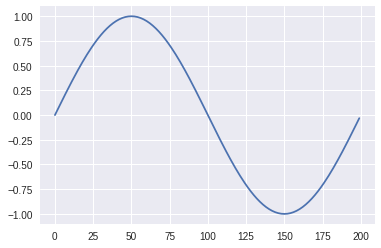

In [69]:
# sin그래프를 그린다
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01)) # 0부터 2까지 0.01 간격으로
t = plt.plot(s)    # sin의 그래프를 그림

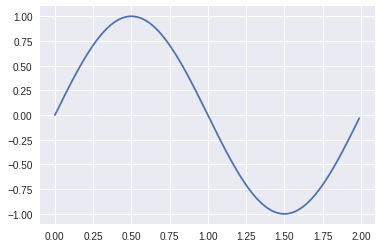

In [70]:
plt.plot(np.arange(0.0, 2.0, 0.01),s) 

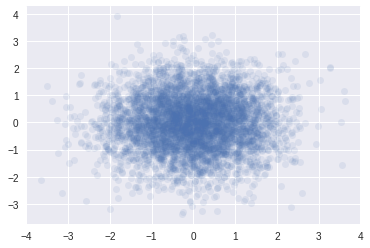

In [71]:
# 산포도(scatter plot)를 그린다
# 인수 마커를 사용하여 산포도를 작성
x = np.random.randn(5000)    # 표준 정규 분포에 따라 난수 생성
y = np.random.randn(5000)
t = plt.plot(x, y, 'o', alpha=0.1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  


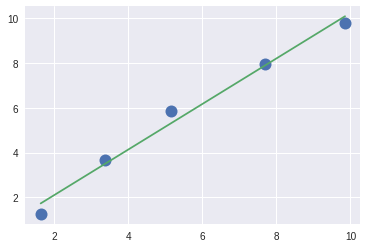

In [72]:
# 그래프를 중복해 그림
x = np.array([1.628, 3.363, 5.145, 7.683, 9.855])
y = np.array([1.257, 3.672, 5.841, 7.951, 9.775])
# 최소 자승법(least square method)으로 데이터를 근사하는 직선을 구함
a = np.array([x, np.ones(x.size)])
a = a.T
m, c = np.linalg.lstsq(a, y)[0]
t = plt.plot(x, y, 'o', ms=12)   # 데이터를 그림
t = plt.plot(x, (m*x+c))  # 근사직선을 그림, m:기울기,c:bias(절편)

### plot( )로 그림을 제어

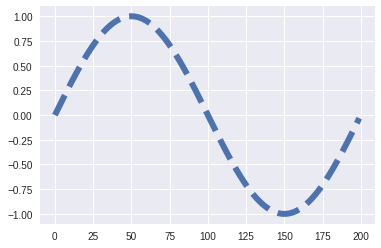

In [74]:
# 선 스타일 변경
s = np.sin(np.pi*np.arange(0.0, 2.0, 0.01))
t = plt.plot(s, linestyle='--', linewidth=6)  # linewidth = 선 두께

### 문자를 삽입한다

In [0]:
# 표시용 폰트 지정
import matplotlib.pyplot as plt
# plt.rcParams['font.family'] = 'AppleGothic'

In [0]:
# 시스템에서 사용 가능한 글꼴 목록을 표시
import matplotlib.font_manager as fm
fontsfamily = fm.findSystemFonts()

In [77]:
fontsfamily[:5]

['/usr/share/fonts/truetype/liberation/LiberationMono-Regular.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-Bold.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationMono-BoldItalic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSerif-Italic.ttf',
 '/usr/share/fonts/truetype/liberation/LiberationSansNarrow-BoldItalic.ttf']

***

# Chapter 12-04
## 일본 인구를 시각화한다

### 인구 데이터를 읽어 들임

In [80]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving female_1944_2014.csv to female_1944_2014.csv
Saving male_1944_2014.csv to male_1944_2014.csv
Saving total_fertility_rate.csv to total_fertility_rate.csv
User uploaded file "female_1944_2014.csv" with length 7323 bytes
User uploaded file "male_1944_2014.csv" with length 7218 bytes
User uploaded file "total_fertility_rate.csv" with length 550 bytes


In [0]:
# 1944년부터 2014년까지의 5계층 단계별로 인구를 남녀별로 읽어 들임
import numpy as np

p_male = np.loadtxt('male_1944_2014.csv', delimiter=",",
                      skiprows=1, usecols=range(1, 22))
p_female = np.loadtxt('female_1944_2014.csv', delimiter=",",
                      skiprows=1, usecols=range(1, 22))

In [82]:
# 계급별과 연도별로 인구를 계산한다.
# 남녀 5세씩의 단계별로 인구를 합계
p_total = p_male+p_female
print(p_total)
# 연도별 인구로 수정
p_yearly = p_total.sum(axis=1)
p_yearly

[[8712. 8803. 8684. ...    0.    0.    0.]
 [9251. 8581. 8645. ...    0.    0.    0.]
 [7858. 8734. 8692. ...    0.    0.    0.]
 ...
 [5272. 5407. 5868. ... 1146.  331.   51.]
 [5239. 5361. 5790. ... 1215.  343.   55.]
 [5213. 5307. 5713. ... 1305.  352.   60.]]


array([ 73063.,  71999.,  73115.,  78101.,  80003.,  81771.,  83199.,
        84571.,  85854.,  87034.,  88294.,  89277.,  90258.,  91086.,
        92010.,  92971.,  93420.,  94285.,  95179.,  96157.,  97187.,
        98275.,  99054., 100244., 101410., 102649., 103719., 105013.,
       107334., 108709., 110050., 111940., 113086., 114153., 115174.,
       116131., 117061., 117879., 118693., 119485., 120237., 121046.,
       121672., 122264., 122784., 123254., 123611., 124044., 124452.,
       124765., 125033., 125568., 125865., 126169., 126485., 126685.,
       126923., 127289., 127433., 127618., 127687., 127766., 127769.,
       127767., 127690., 127509., 128057., 127799., 127513., 127295.,
       127082.])

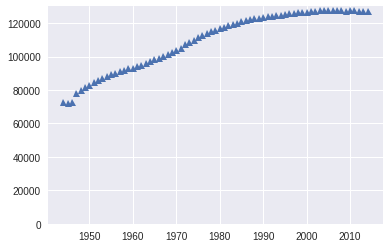

In [83]:
# 연도별 인구를 그래프화 한다
%matplotlib inline
import matplotlib.pyplot as plt

t = plt.plot(range(1944, 2015), p_yearly, '^')
plt.ylim((0, 130000))
plt.grid(True)

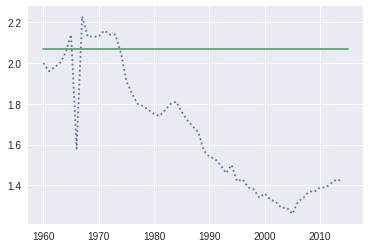

In [84]:
# 출생률(합계 특수 출생률) 그래프를 그린다
# 1960년에서 2014년을 읽어 들임
tfr = np.loadtxt('total_fertility_rate.csv', delimiter=",", skiprows=1)
# 출산율 그래프를 그린다
t = plt.plot(range(1960, 2015), tfr, ls=":")
# 인구 치환 경계선을 2.07로 하여 선을 그림
t = plt.plot([1960, 2015], [2.07, 2.07])

### 인구 피라미드를 그린다

In [0]:
# show_pgraph( ) 함수의 정의
from matplotlib import gridspec

def show_pgraph(year, arr1, arr2, arr3,
                ymin, ymax, ydim=1):
#     fig = plt.figure(figsize=(10,9))
    # 인구 피라미드를 표시
    # 표시하는 인구의 인덱스를 가져옴 (1년 간격)
    idx = int((year-ymin)/ydim)
    # 인구 피라미드와 인구 그래프의 그리드를 생성
    gs = gridspec.GridSpec(2, 2, height_ratios=(3, 2))
    # 그래프의 배치를 결정
    ax = [plt.subplot(gs[0, 0]),plt.subplot(gs[0, 1]),
          plt.subplot(gs[1, :])]
    # 남성 인구 피라미드를 그림
    ax[0].barh(range(0, 101, 5), arr1[idx], height=3)
    ax[0].set(ylim=(0, 100), xlim=(0, 6000))
    ax[0].invert_xaxis()
    ax[0].yaxis.tick_right()
    # 여성 인구 피라미드를 그림
    ax[1].barh(range(0, 101, 5), arr2[idx], height=4)
    ax[1].tick_params(labelleft='off')
    ax[1].set(ylim=(0, 100), xlim=(0, 6000))
    # 인구 그래프를 그림
    ax[2].plot(range(ymin, ymax+1, ydim), arr3, ls=":")
    ax[2].plot([year, year], [0, 140000])

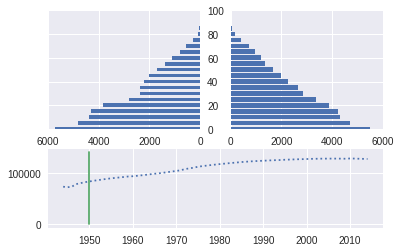

In [86]:
# 인구 피라미드의 그래프를 그린다
show_pgraph(1950, p_male, p_female, p_yearly,
            1944, 2014)

> year를 변경해서 그래프를 그려보시오.

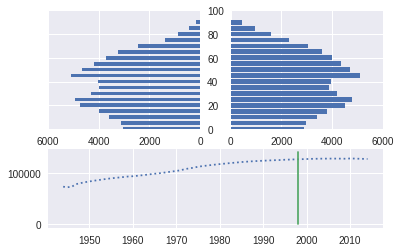

In [87]:
show_pgraph(1998, p_male, p_female, p_yearly,
            1944, 2014)

***

## 특강안내

### VR 응용과 전망 (HC 관련 내용 포함)

### 11월8일(목) 4시~6시, 신어관 101호 강당

***

### [wk10] homework

#### 다음 파이썬 노트북 [tips_reshape](https://github.com/Redwoods/Py/blob/master/py-basic/tips/Tips_py_reshape.ipynb) 을 colab에서 실행하고 설명을 추가해서 github에 올리시오.(마감: 2018.11.11(일). 24:00)

> 제출 파일명: Summary_reshape.ipynb

***